# Particle simulation for magnetic drift flux

### Inits (load modul and define constants)

In [1]:
# Import and define constantes
import numpy as np
import matplotlib.pyplot as plt
import random
from  scipy import ndimage


from matplotlib import animation, rc
from IPython.display import HTML

me = 9.109e-31; #[kg] electron mass
q = 1.6021765650e-19; #[C] electron charge
kb = 1.3806488e-23;  #Blozman constant
eps_0 = 8.8548782e-12; #Vaccum permitivitty

### define the maxwellian initiation and particle pusher

In [2]:
#define the maxwellian function
def velocity_maxw():
    import random
    v_Te = np.sqrt(q*Te/me)

    W = 2
    while (W >= 1 or W <= 0):
        R1 = (random.random()*2 -1 )
        R2 = (random.random()*2 -1 )
        
        W = R1**2 + R2**2
    W = np.sqrt( (-2*np.log(W))/W)
        
    v = v_Te*R1*W
    return v

def pusher(i,Vdrift):
    
    vz = tabe_vz[i]
    vy = tabe_vy[i]
    vx = tabe_vx[i]

    vz = vz - q/me*dT*Ez
    vx = vx - q/me*dT*Ex
    vy = vy - q/me*dT*Ey

    vz = vz - B0*vy
    vy = vy + B0*vz

    #vz = vz*np.cos(B0) - vy*np.sin(B0)
    #vy = vz*np.sin(B0) + vy*np.cos(B0)

    tabe_vz[i] = vz
    tabe_vy[i] = vy

    tabe_z[i] = tabe_z[i] + (Vdrift + tabe_vz[i]) *dT
    tabe_y[i] = tabe_y[i] + ( tabe_vy[i]) *dT
    
def visu_script():
    plt.figure(figsize=(8,4))
    plt.subplot(121)    
    plt.hist(tabe_z,Nx,normed=1)
    plt.title("spatial distribution")
    plt.ylabel("probabitlity fonction")
    plt.xlabel("axial position [m]")

    plt.subplot(122)    

    plt.hist(tabe_vz/1000, 100, normed=1, facecolor='green', alpha=0.75)
    plt.title("Probability fonction of velocity")
    plt.ylabel("probabitlity fonction")
    plt.xlabel("velocity v [km/s]")

    plt.show()

def init_part(Np):
    tabe_vx = np.zeros(Np)
    tabe_vz = np.zeros(Np)
    tabe_vy = np.zeros(Np)

    tabe_z = np.zeros(Np)
    tabe_y = np.zeros(Np)

    #init velocitises
    for i in np.arange(Np):
        tabe_vx[i] = velocity_maxw()
        tabe_vy[i] = velocity_maxw()
        tabe_vz[i] = velocity_maxw()

    #calculate positions
    for i in np.arange(Np):
        R = random.random()
        R *= Lx
        tabe_z[i] = R
        
    return tabe_vx, tabe_vz, tabe_vy, tabe_z, tabe_y

# initialization function: plot the background of each frame
def init_sca():
    pathcol.set_offsets([[], []])
    return [pathcol]

# animation function. This is called sequentially
def animate(i):
    
    for i in np.arange(Np):

        pusher(i,Vdrift = vd)
    
    p = np.zeros((Np,2))
    for i in np.arange(Np):
        p[i,0] = tabe_y[i]
        p[i,1] = tabe_z[i]

    pathcol.set_offsets(p)
    return [pathcol]

###  Simulation parmeters

In [3]:
Lx = 0.02      #[m]
Nx = 100       #number of cells
Te = 10;     #[eV] Electron distribution temperature

Ex, Ey, Ez = 0, 0, 0        #[V/m]
dT = 0.8e-11    #[s]
B0 = 10e-2*q/me*dT   #[T] then factor param for Boris scheme
dX = 1e-5
vd = 100000  # [m/s]

### init the simulation particles

The temperatur in the X direction is : 9.989 eV, to compare to the theoritical 10 eV


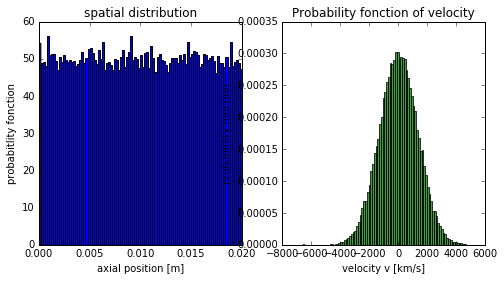

In [4]:
#initiate Maxwellian 
Np = 60000;  #Number of particle to create
tabe_vx, tabe_vz, tabe_vy, tabe_z, tabe_y = init_part(Np)
    
    
# validate : 

temp = me/q * np.mean( tabe_vx **2 )

print("The temperatur in the X direction is : {mes:2.3f} eV, ".format(mes = temp) +\
       "to compare to the theoritical {theo} eV".format(theo = Te))

visu_script()

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -Lx/2, Lx/2))
ax.set_ylim((0, Lx))

pathcol = plt.scatter([], [], lw=2)


Np = 5
tabe_vx, tabe_vz, tabe_vy, tabe_z, tabe_y = init_part(Np)



# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init_sca,
                               frames=1500, interval=20, blit=True)

HTML(anim.to_html5_video())

### run few timesteps without drift

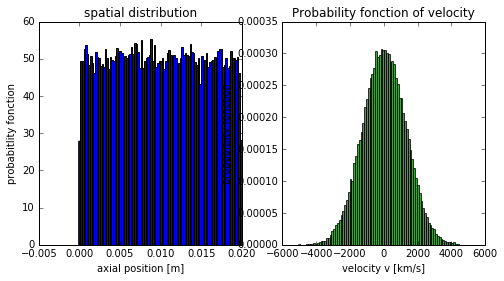

In [7]:
# remove particles leaving the space fo a spedo steady state
plt.close()

Np = 60000
tabe_vx, tabe_vz, tabe_vy, tabe_z, tabe_y = init_part(Np)

for y in np.arange(130):
    for i in np.arange(Np):
        
        pusher(i,Vdrift = 0)

    mask = tabe_z < Lx        
    tabe_z = tabe_z[mask]

    tabe_vz = tabe_vz[mask]
    tabe_vx = tabe_vx[mask]
    tabe_vy = tabe_vy[mask]
        
    Np = np.size(tabe_z)
    
visu_script()

### run with drift

step  0  over  1737
step  200  over  1737
step  400  over  1737
step  600  over  1737
step  800  over  1737
step  1000  over  1737
step  1200  over  1737
step  1400  over  1737
step  1600  over  1737
energy =  1.014619281e-14  J
particles =  55634  #


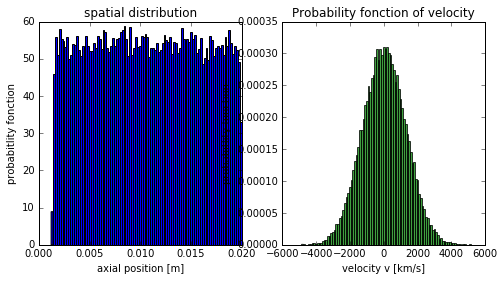

In [8]:
#move paticle with drift velocity
ener = 0
Nt = 1737
save_vx = np.array([])
save_vy = np.array([])
save_vz = np.array([])

for y in np.arange(Nt):
    if y%200 == 0:
        print("step ",y, " over ",Nt)
    for i in np.arange(Np):
        
        pusher(i,Vdrift = vd)

    mask = tabe_z < Lx
    anti_mask = tabe_z >= Lx
    ener += 1/2*me*np.sum(tabe_vz[anti_mask]**2 + tabe_vx[anti_mask]**2 + tabe_vy[anti_mask]**2 )
    save_vx = np.append(save_vx,np.array(tabe_vx[anti_mask]))
    save_vz = np.append(save_vz,np.array(tabe_vz[anti_mask]))
    save_vy = np.append(save_vy,np.array(tabe_vy[anti_mask]))
        
    tabe_z = tabe_z[mask]

    tabe_vz = tabe_vz[mask]
    tabe_vx = tabe_vx[mask]
    tabe_vy = tabe_vy[mask]
        
    Np = np.size(tabe_z)
       
print("energy = ",ener," J")
print("particles = ",Np," #")

#plot the distribution
visu_script()
    



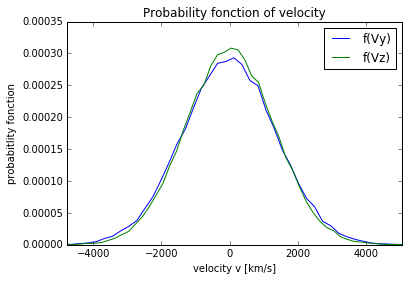

In [9]:
#plasma distribution function
Nbins = 50

n, bins = np.histogram([tabe_vy/1000], Nbins, normed=1)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vy)")

n, bins = np.histogram([tabe_vz/1000], Nbins, normed=1)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz)")

plt.legend(loc="best")
plt.title("Probability fonction of velocity")
plt.xlim(center_bins[0],center_bins[-1] )
plt.ylabel("probabitlity fonction")
plt.xlabel("velocity v [km/s]")

plt.show()

In [13]:
ne = Np/Lx

Qez = ne * vd * (3/2)* (Te) * Nt*dT
ener_eV = ener /q

#energy flux analyse
print("theorical energy flux over the simulation : ", Qez, " eV")
print("measured energy flux over the simulation : ",ener_eV, "eV")
print("ener_eV = ",ener_eV/Qez," *ne.vd.3/2.Te")

theorical energy flux over the simulation :  57981.7548  eV
measured energy flux over the simulation :  63327.5572223 eV
ener_eV =  1.09219801023  *ne.vd.3/2.Te


### Plot distribution close to the anode compared to the bulk

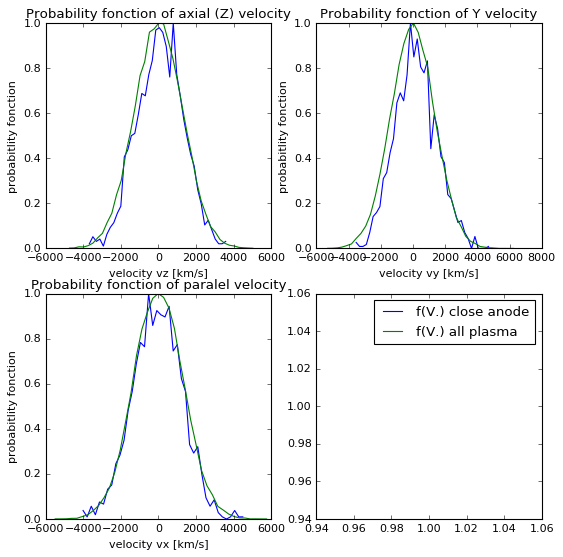

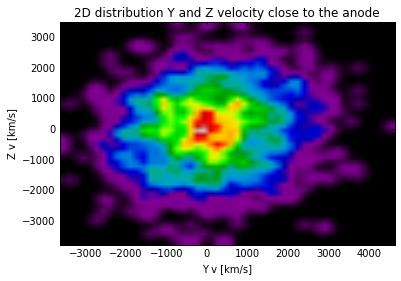

In [11]:
#distribution close to the anode
cells = 3
anti_mask = tabe_z >= Lx*(1-cells/Nx)

Nbins = 40
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221)
n, bins = np.histogram([tabe_vz[anti_mask]/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) close anode")

n, bins = np.histogram([tabe_vz/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) plasma")

plt.title("Probability fonction of axial (Z) velocity")
plt.ylabel("probabitlity fonction")
plt.xlabel("velocity vz [km/s]")


plt.subplot(222)
n, bins = np.histogram([tabe_vy[anti_mask]/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) close anode")

n, bins = np.histogram([tabe_vy/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) plasma")

plt.title("Probability fonction of Y velocity")
plt.ylabel("probabitlity fonction")
plt.xlabel("velocity vy [km/s]")


plt.subplot(223)
n, bins = np.histogram([tabe_vx[anti_mask]/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) close anode")

n, bins = np.histogram([tabe_vx/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vz) plasma")

plt.title("Probability fonction of paralel velocity")
plt.ylabel("probabitlity fonction")
plt.xlabel("velocity vx [km/s]")

plt.subplot(224)

plt.plot(1, 1, label="f(V.) close anode")
plt.plot(1, 1, label="f(V.) all plasma")
plt.legend()


plt.show()

Nbins = 50
H,xedges,yedges  = np.histogram2d(tabe_vz[anti_mask]/1000,tabe_vy[anti_mask]/1000, normed=1, bins= Nbins)
H = ndimage.filters.gaussian_filter(H, 1)

plt.imshow(H,cmap = 'nipy_spectral', origin='lower',extent=(yedges[0],yedges[Nbins-1],xedges[0],xedges[Nbins-1]), aspect="auto")


plt.title("2D distribution Y and Z velocity close to the anode")
plt.ylabel("Z v [km/s]")
plt.xlabel("Y v [km/s]")

plt.show()

### plot the distribution of the flux at the anode

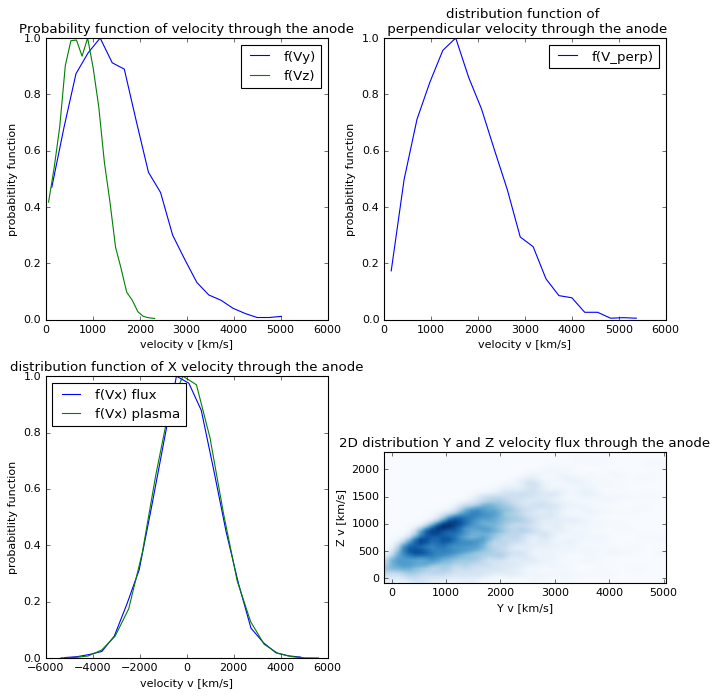

In [17]:
#flux distribution
Nbins = 20

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221)
n, bins = np.histogram([abs(save_vy)/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot((center_bins), n, label="f(Vy)")

n, bins = np.histogram([abs(save_vz)/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot((center_bins), n, label="f(Vz)")

plt.legend(loc="best")
plt.title("Probability function of velocity through the anode")
plt.ylabel("probabitlity function")
plt.xlabel("velocity v [km/s]")

plt.subplot(222)

toplot = np.sqrt((save_vy**2 + save_vz**2))/1000

n, bins = np.histogram([toplot], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(V_perp)")

plt.legend(loc="best")
plt.title("distribution function of \n perpendicular velocity through the anode")
plt.ylabel("probabitlity function")
plt.xlabel("velocity v [km/s]")

plt.subplot(223)

n, bins = np.histogram([save_vx/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vx) flux")

n, bins = np.histogram([tabe_vx/1000], Nbins, normed=1)
n /= np.max(n)
center_bins = (bins[1:]+bins[:-1])/2
plt.plot(center_bins, n, label="f(Vx) plasma")

plt.legend(loc="best")
plt.title("distribution function of X velocity through the anode")
plt.ylabel("probabitlity function")
plt.xlabel("velocity v [km/s]")

plt.subplot(224)

Nbins = 50
H,xedges,yedges  = np.histogram2d(save_vz/1000,save_vy/1000, normed=1, bins= Nbins)
H = ndimage.filters.gaussian_filter(H, 1)

plt.imshow(H,cmap = 'Blues', origin='lower',extent=(yedges[0],yedges[Nbins-1],xedges[0],xedges[Nbins-1]))


plt.title("2D distribution Y and Z velocity flux through the anode")
plt.ylabel("Z v [km/s]")
plt.xlabel("Y v [km/s]")


plt.show()